# Predicting the Sale Price of Bulldozer using Machine Learning

### 1. Problem Definition

How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

### 2. Data

Kaggle dataset - https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

1. **Traiin.csv** - Historical bulldozer sales examples up to 2011
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to Nov 2012

### 3. Evaluation

Root Mean Squared Log Error (RMSLE)

### 4. Importing the data and preparing it for modelling

In [3]:
# Import data analysis tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import training and validation set

path = '/content/TrainAndValid.csv'
df = pd.read_csv(path, error_bad_lines=False)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(112463, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112463 entries, 0 to 112462
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   112463 non-null  int64  
 1   SalePrice                 112463 non-null  int64  
 2   MachineID                 112463 non-null  int64  
 3   ModelID                   112463 non-null  int64  
 4   datasource                112463 non-null  int64  
 5   auctioneerID              112463 non-null  int64  
 6   YearMade                  112463 non-null  int64  
 7   MachineHoursCurrentMeter  26480 non-null   float64
 8   UsageBand                 23554 non-null   object 
 9   saledate                  112463 non-null  object 
 10  fiModelDesc               112463 non-null  object 
 11  fiBaseModel               112463 non-null  object 
 12  fiSecondaryDesc           80944 non-null   object 
 13  fiModelSeries             8781 non-null    o

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter     85983
UsageBand                    88909
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc              31519
fiModelSeries               103682
fiModelDescriptor            93959
ProductSize                  63721
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                 76490
Enclosure                       25
Forks                        54684
Pad_Type                     84808
Ride_Control                 64814
Stick                        84808
Transmission                 50505
Turbocharged                 84808
Blade_Extension     

In [8]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

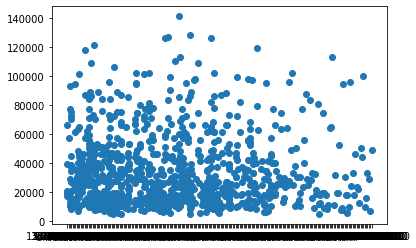

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [10]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [11]:
df.saledate.dtype

dtype('O')

<AxesSubplot:ylabel='Frequency'>

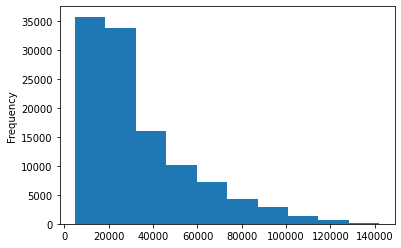

In [12]:
df.SalePrice.plot.hist()

### Parsing dates

In [13]:
# Importing data again but this time parse date

df = pd.read_csv(path, low_memory=False, parse_dates=['saledate'])

In [14]:
df.saledate.dtype

dtype('<M8[ns]')

In [15]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

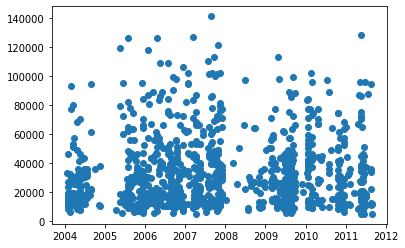

In [16]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [19]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

In [20]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head()

63167   1989-01-31
75378   1989-01-31
32317   1989-01-31
54438   1989-01-31
54653   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe

In [21]:
df_tmp = df.copy()

### Add datatime parameters for the saledate column

In [22]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDatOfYear'] = df_tmp['saledate'].dt.dayofyear

In [23]:
df_tmp.head().T

,63167,75378,32317,54438,54653
SalesID,1329620,1363540,1265202,1301582,1301884
SalePrice,26500,22500,21000,24000,23500
MachineID,1253848,1413842,1385055,1199381,1182999
ModelID,4089,7267,6788,4123,4123
datasource,132,132,132,132,132
auctioneerID,99,99,99,18,99
YearMade,1987,1976,1984,1974,1976
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [24]:
# remove saledate

df_tmp.drop(columns=['saledate'], inplace=True, axis=1)

In [25]:
df_tmp.state.value_counts()

Florida           15681
Texas             14700
California         7512
Georgia            3979
Washington         3684
Mississippi        3570
Pennsylvania       3542
Ohio               3411
Illinois           3277
Tennessee          3073
New Jersey         3065
North Carolina     3044
Maryland           2970
Alabama            2958
Colorado           2887
South Carolina     2515
Arizona            2487
New York           2322
Louisiana          2293
Minnesota          2016
Kentucky           2012
Missouri           1923
Nevada             1802
Connecticut        1673
Maine              1672
Indiana            1522
Unspecified        1428
Arkansas           1075
New Mexico         1022
Wisconsin           870
Utah                868
New Hampshire       829
Virginia            799
Oregon              727
Wyoming             658
Idaho               612
Oklahoma            550
West Virginia       544
Iowa                479
Michigan            431
Kansas              424
Montana         

In [26]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDatOfYear
63167,1329620,26500,1253848,4089,132,99,1987,NaN,NaN,D3B,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
75378,1363540,22500,1413842,7267,132,99,1976,NaN,NaN,930,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
32317,1265202,21000,1385055,6788,132,99,1984,NaN,NaN,580,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
54438,1301582,24000,1199381,4123,132,18,1974,NaN,NaN,D6C,...,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,1989,1,31,1,31
54653,1301884,23500,1182999,4123,132,99,1976,NaN,NaN,D6C,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31


In [27]:
len(df_tmp)

112463

### 5. Modelling

Some model driven EDA

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
#model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

In [29]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112463 entries, 63167 to 23968
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   112463 non-null  int64  
 1   SalePrice                 112463 non-null  int64  
 2   MachineID                 112463 non-null  int64  
 3   ModelID                   112463 non-null  int64  
 4   datasource                112463 non-null  int64  
 5   auctioneerID              112463 non-null  int64  
 6   YearMade                  112463 non-null  int64  
 7   MachineHoursCurrentMeter  26480 non-null   float64
 8   UsageBand                 23554 non-null   object 
 9   fiModelDesc               112463 non-null  object 
 10  fiBaseModel               112463 non-null  object 
 11  fiSecondaryDesc           80944 non-null   object 
 12  fiModelSeries             8781 non-null    object 
 13  fiModelDescriptor         18504 non-null 

In [30]:
df_tmp['UsageBand'].dtype

dtype('O')

In [31]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter     85983
UsageBand                    88909
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc              31519
fiModelSeries               103682
fiModelDescriptor            93959
ProductSize                  63721
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                 76490
Enclosure                       25
Forks                        54684
Pad_Type                     84808
Ride_Control                 64814
Stick                        84808
Transmission                 50505
Turbocharged                 84808
Blade_Extension             104149
Blade_Width         

### Convert string to categories

In [32]:
df_tmp.head().T

,63167,75378,32317,54438,54653
SalesID,1329620,1363540,1265202,1301582,1301884
SalePrice,26500,22500,21000,24000,23500
MachineID,1253848,1413842,1385055,1199381,1182999
ModelID,4089,7267,6788,4123,4123
datasource,132,132,132,132,132
auctioneerID,99,99,99,18,99
YearMade,1987,1976,1984,1974,1976
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,D3B,930,580,D6C,D6C


In [33]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [34]:
# Find columns which contain strings

for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
# Turn string values into category values

for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()


In [36]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112463 entries, 63167 to 23968
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   112463 non-null  int64   
 1   SalePrice                 112463 non-null  int64   
 2   MachineID                 112463 non-null  int64   
 3   ModelID                   112463 non-null  int64   
 4   datasource                112463 non-null  int64   
 5   auctioneerID              112463 non-null  int64   
 6   YearMade                  112463 non-null  int64   
 7   MachineHoursCurrentMeter  26480 non-null   float64 
 8   UsageBand                 23554 non-null   category
 9   fiModelDesc               112463 non-null  category
 10  fiBaseModel               112463 non-null  category
 11  fiSecondaryDesc           80944 non-null   category
 12  fiModelSeries             8781 non-null    category
 13  fiModelDescriptor         

In [37]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [38]:
df_tmp.state.cat.codes

63167     8
75378     8
32317     8
54438     9
54653     8
         ..
23972    43
23971    43
23970     4
23967    10
23968     4
Length: 112463, dtype: int8

In [39]:
# Check missing data %

df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.764545
UsageBand                   0.790562
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.280261
fiModelSeries               0.921921
fiModelDescriptor           0.835466
ProductSize                 0.566595
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.680135
Enclosure                   0.000222
Forks                       0.486240
Pad_Type                    0.754097
Ride_Control                0.576314
Stick                       0.754097
Transmission                0.449081
Turbocharged                0.754097
B

### Save processed data

In [40]:
# df_tmp.to_csv('train.csv', index=False)

### Fill missing values

In [41]:
# Fill numerical missing values first

for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDatOfYear


In [42]:
# check for which numerical columns have null values

for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

MachineHoursCurrentMeter


In [43]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column that tells us if the data was missing
      df_tmp[label+'is_missing'] = pd.isnull(content)
      # Replace null with meadian
      df_tmp[label] = content.fillna(content.median())

In [44]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                              88909
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                        31519
fiModelSeries                         103682
fiModelDescriptor                      93959
ProductSize                            63721
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                           76490
Enclosure                                 25
Forks                                  54684
Pad_Type  

In [45]:
# Filling and turning categorical values into numbers

for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [46]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_tmp[label] = le.fit_transform(df_tmp[label])

In [47]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDatOfYear,MachineHoursCurrentMeteris_missing
63167,1329620,26500,1253848,4089,132,99,1987,2613.5,3,1262,...,5,5,3,3,1989,1,31,1,31,True
75378,1363540,22500,1413842,7267,132,99,1976,2613.5,3,1039,...,10,7,2,1,1989,1,31,1,31,True
32317,1265202,21000,1385055,6788,132,99,1984,2613.5,3,642,...,10,7,3,3,1989,1,31,1,31,True
54438,1301582,24000,1199381,4123,132,18,1974,2613.5,3,1365,...,4,5,3,3,1989,1,31,1,31,True
54653,1301884,23500,1182999,4123,132,99,1976,2613.5,3,1365,...,7,5,3,3,1989,1,31,1,31,True


### Instantiating RandomForest model

In [48]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [49]:
# Score the model

model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9878772073597548

### Splitting data into train/validation sets

In [50]:
df_tmp.saleYear

63167    1989
75378    1989
32317    1989
54438    1989
54653    1989
         ... 
23972    2011
23971    2011
23970    2011
23967    2011
23968    2011
Name: saleYear, Length: 112463, dtype: int64

In [51]:
df_tmp.saleYear.value_counts()

2006    8279
2005    8171
2004    7808
2001    6895
2002    6620
2000    6295
2009    6196
2011    5980
2010    5718
2003    5679
2007    4789
1998    4685
2008    4595
1999    4469
1995    3579
1997    3555
1996    3538
1994    3479
1993    2879
1992    2531
1991    2494
1989    2166
1990    2063
Name: saleYear, dtype: int64

In [52]:
df_val = df_tmp[df_tmp['saleYear'] == 2011]
df_train = df_tmp[df_tmp['saleYear'] != 2012]

In [53]:
len(df_val), len(df_train)

(5980, 112463)

In [54]:
X_train, y_train = df_train.drop('saleYear', axis=1), df_train['saleYear']
X_val, y_val = df_val.drop('saleYear', axis=1), df_val['saleYear']

In [55]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((112463, 57), (112463,), (5980, 57), (5980,))

### Building an evaluation function

In [56]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):

  return np.sqrt(mean_squared_log_error(y_test, y_preds))


def show_scores(model):

  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_val, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_val, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_val, val_preds)}

  return scores

### Testing our model on a subset (to tune hyperparameters)

In [57]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [58]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [59]:
(X_train.shape[0] * 100) / 1000000

11.2463

In [60]:
show_scores(model)

{'Training MAE': 1.6037853338431287,
 'Valid MAE': 1.168392976588628,
 'Training RMSLE': 0.001170525750177496,
 'Valid RMSLE': 0.0012312785349023283,
 'Training R^2': 0.8415769046604271,
 'Valid R^2': 0.0}

### Hyperparameter tuning with RandomizedSearchCV

In [61]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 3}

In [63]:
show_scores(rs_model)

{'Training MAE': 3.0641326636871073,
 'Valid MAE': 3.0970793231487717,
 'Training RMSLE': 0.001965446183969585,
 'Valid RMSLE': 0.002186963760653884,
 'Training R^2': 0.5534516429350034,
 'Valid R^2': 0.0}

### Train a model with best Hyperparameters

In [64]:
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_split=14,
                                    min_samples_leaf=9,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=9,
                      min_samples_split=14, n_estimators=90, n_jobs=-1,
                      random_state=42)

In [65]:
show_scores(rs_model)

{'Training MAE': 3.0641326636871042,
 'Valid MAE': 3.0970793231487552,
 'Training RMSLE': 0.001965446183969582,
 'Valid RMSLE': 0.0021869637606538803,
 'Training R^2': 0.5534516429350038,
 'Valid R^2': 0.0}

In [66]:
show_scores(ideal_model)

{'Training MAE': 1.272229314053768,
 'Valid MAE': 0.9168835893822311,
 'Training RMSLE': 0.0009574315828059192,
 'Valid RMSLE': 0.0010136627864992462,
 'Training R^2': 0.8939877611133036,
 'Valid R^2': 0.0}

### Make predictions on test data

In [69]:
# Import test data

path = '/content/Test.csv'
df_test = pd.read_csv(path, low_memory=False, parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [70]:
df_test.shape

(12457, 52)

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [73]:
def preprocess_data(df):

  df['saleYear'] = df.saledate.dt.year
  df['saleMonth'] = df.saledate.dt.month
  df['saleDay'] = df.saledate.dt.day
  df['saleDayOfWeek'] = df.saledate.dt.dayofweek
  df['saleDayOfYear'] = df.saledate.dt.dayofyear

  df.drop('saledate', axis=1, inplace=True)

  le = preprocessing.LabelEncoder()

  for label, content in df.items():
    
    # fill numerical missing values with median
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label+'is_missing'] = pd.isnull(content)
        df[label] = content.fillna(content.median())
    
    # fill categorical missing values with label encoding
    else:
      df[label] = le.fit_transform(df[label])

  return df

In [74]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeteris_missing
0,1227829,1006309,3168,121,3,1999,3688.0,1,498,179,...,8,6,3,3,2012,5,3,3,124,False
1,1227844,1022817,7271,121,3,1000,28555.0,0,830,291,...,8,6,2,1,2012,5,10,3,131,False
2,1227847,1031560,22805,121,3,2004,6038.0,2,1176,403,...,8,6,3,3,2012,5,10,3,131,False
3,1227848,56204,1269,121,3,2006,8940.0,0,286,112,...,8,6,3,3,2012,5,10,3,131,False
4,1227863,1053887,22312,121,3,2005,2286.0,1,565,195,...,3,4,3,3,2012,5,10,3,131,False


In [75]:
test_preds = ideal_model.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saleDayOfYear
- saleYear
Feature names seen at fit time, yet now missing:
- SalePrice
- saleDatOfYear

  warnings.warn(message, FutureWarning)


In [77]:
# We can find how the columns differ using sets
# set(X_train.columns) - set(df_test.columns)

In [76]:
test_preds

array([2010.48474727, 2010.48540086, 2010.4787823 , ..., 2007.19207653,
       2007.19207653, 2007.44777348])

In [78]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,2010.484747
1,1227844,2010.485401
2,1227847,2010.478782
3,1227848,2010.524595
4,1227863,2010.479519
...,...,...
12452,6643171,2007.434331
12453,6643173,2007.192077
12454,6643184,2007.192077
12455,6643186,2007.192077


### Feature Importance

In [80]:
ideal_model.feature_importances_

array([3.00663620e-01, 8.11277774e-02, 1.45480531e-02, 4.81607503e-02,
       8.11602621e-02, 2.32890291e-02, 2.34874869e-01, 6.38767996e-03,
       1.72282748e-02, 1.39827066e-02, 7.87807397e-03, 1.94604049e-02,
       6.97146962e-04, 1.06907463e-03, 6.29486247e-03, 1.35760253e-02,
       1.16913665e-02, 4.77457854e-04, 8.39948272e-04, 2.46419548e-03,
       2.30953541e-03, 5.20214605e-04, 1.56768636e-03, 4.68107802e-04,
       5.04409032e-04, 2.65192287e-03, 1.98048740e-03, 3.51536164e-04,
       5.86298823e-04, 1.58327296e-04, 4.26903465e-04, 1.14625421e-03,
       3.43941083e-04, 3.11885774e-03, 5.14895653e-04, 7.13354975e-03,
       8.82144809e-03, 3.65183984e-03, 1.27372263e-03, 4.87563213e-04,
       4.51353909e-04, 1.82227185e-04, 3.26176532e-04, 3.16762456e-04,
       1.87606045e-04, 1.25587691e-04, 4.65848332e-04, 5.51098859e-04,
       3.20739488e-03, 5.92260565e-04, 1.41423889e-04, 9.79336521e-05,
       4.93836129e-03, 1.01521844e-02, 8.88457000e-03, 1.59958719e-02,
      

In [83]:
# Helper function for plotting feature importance

def plot_features(columns, importances, n=20):
  df = (pd.DataFrame({"features": columns,
                     "feature_importances": importances})
        .sort_values('feature_importances', ascending=False)
        .reset_index(drop=True))
  
  # Plot the dataframe
  fig, ax = plt.subplots()
  ax.barh(df['features'][:n], df['feature_importances'][:20])
  ax.set_xlabel('Feature importance')
  ax.set_ylabel('Features')
  ax.invert_yaxis()

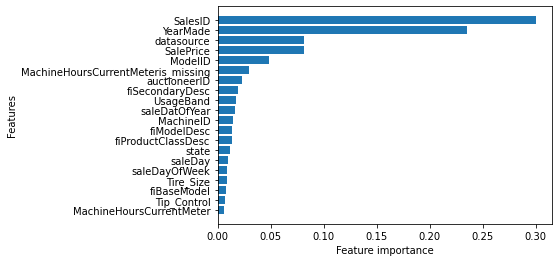

In [84]:
plot_features(X_train.columns, ideal_model.feature_importances_)